<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Mushroom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Mushroom data.csv")
df_new = df.drop(['veil_type'],axis =1)

In [3]:
for i in range(len(df_new.columns)):
  if((df_new[df_new.columns[i]].dtype) == 'object'):
    df_new[df_new.columns[i]] =  LabelEncoder().fit_transform(df_new[df_new.columns[i]])

In [4]:
X = df_new.drop(['Mushroom_quality'],axis =1)
y = df_new['Mushroom_quality']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

[1.751e+01 2.141e+02 1.151e+01 1.194e+03 7.591e+01 3.505e+00 8.268e+02
 1.637e+03 5.958e+03 3.659e+01 1.186e+03 2.230e+02 2.066e+02 1.198e+02
 1.098e+02 5.127e+00 2.565e+01 1.951e+03 3.791e+02 3.118e+02 7.513e+02]


Text(0, 0.5, 'Features name')

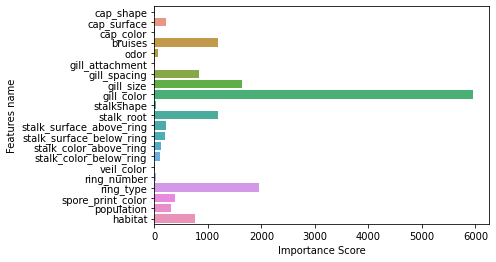

In [6]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_
print(score)
Y = X.columns
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [7]:
dc = {'Chi2 ranking': X.columns[score.argsort()[::-1]]}
ranking_chi = pd.DataFrame(data =  dc)
ranking_chi.to_excel("mushroom_dataset.xlsx",sheet_name='Chi_2')  

In [8]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [9]:
rf.feature_importances_

array([0.005, 0.008, 0.015, 0.039, 0.154, 0.002, 0.039, 0.11 , 0.122,
       0.023, 0.058, 0.053, 0.05 , 0.012, 0.016, 0.003, 0.013, 0.083,
       0.094, 0.072, 0.03 ])

Text(0.5, 0, 'Feature Importance')

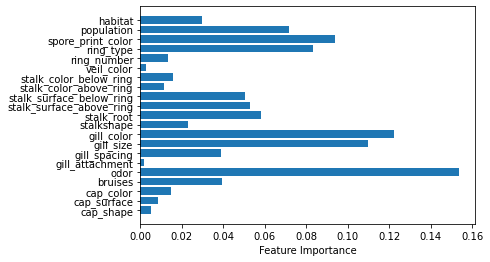

In [10]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [11]:
dc = {'Tree based method Attributes': X.columns[rf.feature_importances_.argsort()[::-1]] }
rank_tree = pd.DataFrame(data =  dc) 
from openpyxl import load_workbook
book = load_workbook('/content/mushroom_dataset.xlsx')
writer = pd.ExcelWriter('/content/mushroom_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_tree.to_excel(writer, "Tree_based_method")
writer.save()

Text(0.5, 0, 'Feature Importance MEAN')

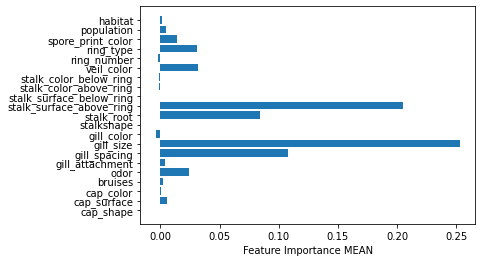

In [12]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

Text(0.5, 0, 'Feature Importance STD')

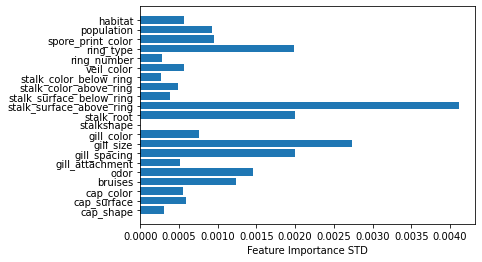

In [13]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

In [14]:
dc = {'Permutation_importance_mean': X.columns[result.importances_mean.argsort()[::-1]]}
rank_per_mean = pd.DataFrame(data =  dc) 
book = load_workbook('/content/mushroom_dataset.xlsx')
writer = pd.ExcelWriter('/content/mushroom_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_mean.to_excel(writer, "permutation_method_mean")
writer.save()

In [15]:
dc = {'Permutation_importance_std': X.columns[result.importances_std.argsort()[::-1]]}
rank_per_std = pd.DataFrame(data =  dc) 
book = load_workbook('/content/mushroom_dataset.xlsx')
writer = pd.ExcelWriter('/content/mushroom_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_std.to_excel(writer, "permutation_method_std")
writer.save()

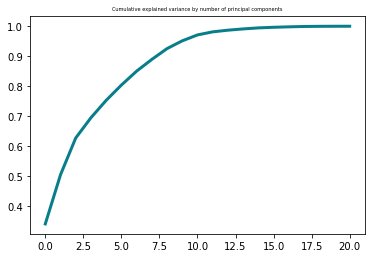

In [16]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [17]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
cap_shape,-0.019120,0.033373,0.223885,-0.495258,-0.064250,1.021059,1.081894,0.210189,-0.002736,-0.004555,...,-0.018714,0.004714,0.000076,-0.000919,-0.005818,0.000239,0.004127,0.000001,-0.000135,0.000024
cap_surface,0.268751,-0.013434,-0.118644,0.234964,0.214355,-0.236667,0.208799,0.294765,-0.052140,-1.063985,...,-0.068499,0.038970,0.006906,0.008942,-0.007300,0.015135,-0.013331,0.000626,0.000453,-0.000092
cap_color,-0.795502,1.792788,-1.259148,0.646336,-0.700856,0.062889,0.166985,0.177593,-0.032683,0.040670,...,-0.015844,-0.020870,-0.008445,-0.023102,0.004810,0.005290,0.001368,0.000682,0.001170,0.000104
bruises,-0.262856,-0.129290,-0.057977,-0.050341,0.064121,-0.100530,0.018207,0.177212,-0.045119,-0.026741,...,0.060943,-0.085314,-0.001689,-0.238925,-0.035175,-0.112155,0.034726,-0.088320,-0.032083,0.001300
odor,0.856449,-1.336547,-0.117629,0.287238,-0.915716,0.486397,-0.508878,0.649452,-0.165518,-0.008869,...,-0.051609,0.016970,-0.010843,0.019656,-0.006596,-0.007394,-0.001377,0.002177,-0.002164,-0.000234


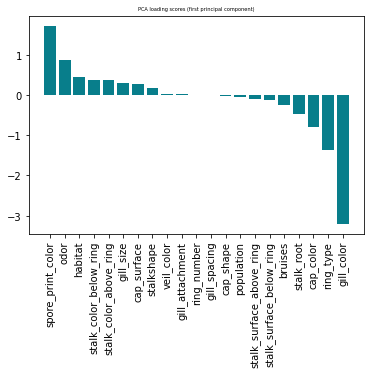

In [18]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
rank_pca = pd.DataFrame(loadings['PC1'])
rank_pca =  rank_pca.sort_values(by='PC1', ascending = False)
book = load_workbook('/content/mushroom_dataset.xlsx')
writer = pd.ExcelWriter('/content/mushroom_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_pca.to_excel(writer, "PCA")
writer.save()

In [20]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

array([ 7,  8,  3, 17, 10,  6, 11, 12, 19, 16, 20, 18,  1, 13, 14, 15,  5,
        9,  4,  0,  2])

In [21]:
best_features_fscore = df_new.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['gill_spacing' 'gill_size' 'cap_color' 'ring_number' 'stalkshape'
 'gill_attachment' 'stalk_root' 'stalk_surface_above_ring'
 'spore_print_color' 'veil_color' 'population' 'ring_type' 'cap_shape'
 'stalk_surface_below_ring' 'stalk_color_above_ring'
 'stalk_color_below_ring' 'odor' 'gill_color' 'bruises' 'Mushroom_quality'
 'cap_surface']
[3095.207 2931.53  2504.101 1497.849 1242.906 1001.112  885.168  716.775
  706.582  364.117  354.681  241.771  240.731  165.169  153.238  150.888
  117.22    80.443   66.454   18.798    6.983]


Text(0, 0.5, 'Features')

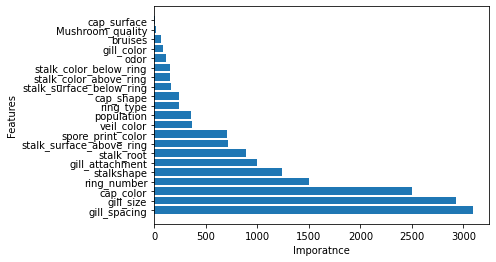

In [22]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [25]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['bruises', 'ring_number', 'gill_size', 'veil_color', 'stalk_root',
       'stalk_surface_above_ring', 'stalk_surface_below_ring',
       'stalk_color_above_ring', 'gill_spacing', 'cap_color', 'ring_type',
       'spore_print_color', 'stalkshape', 'gill_attachment',
       'Mushroom_quality', 'veil_type', 'cap_surface', 'cap_shape',
       'stalk_color_below_ring', 'gill_color', 'odor'], dtype=object)

In [23]:
rank_f_test = pd.DataFrame(best_features_fscore, columns = ['F_test_rank']) 
book = load_workbook('/content/mushroom_dataset.xlsx')
writer = pd.ExcelWriter('/content/mushroom_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_f_test.to_excel(writer, "F_test")
writer.save()

In [26]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.628, 0.328, 0.293, 0.216, 0.189, 0.186, 0.179, 0.173, 0.162,
       0.141, 0.132, 0.106, 0.093, 0.063, 0.028, 0.027, 0.023, 0.016,
       0.011, 0.008, 0.   ])

Text(0, 0.5, 'Features')

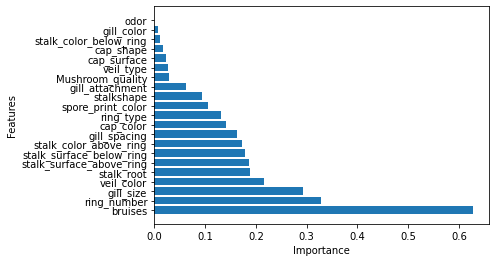

In [27]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [28]:
rank_mutual = pd.DataFrame(best_features_mutual_info,columns = ['Mutual_Info_rank'])
book = load_workbook('/content/mushroom_dataset.xlsx')
writer = pd.ExcelWriter('/content/mushroom_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_mutual.to_excel(writer, "mutual_info")
writer.save()

In [29]:
df_corr = df_new.corr()
df_corr

,Mushroom_quality,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
Mushroom_quality,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap_shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap_surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap_color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill_attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill_spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill_size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill_color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [32]:
corr_rank = pd.DataFrame(df_corr['Mushroom_quality'])
corr_rank = corr_rank.sort_values(by = 'Mushroom_quality',ascending = False)
corr_rank

,Mushroom_quality
Mushroom_quality,1.000000
gill_size,0.540024
population,0.298686
habitat,0.217179
cap_surface,0.178446
spore_print_color,0.171961
veil_color,0.145142
gill_attachment,0.129200
cap_shape,0.052951
cap_color,-0.031384


In [33]:
book = load_workbook('/content/mushroom_dataset.xlsx')
writer = pd.ExcelWriter('/content/mushroom_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
corr_rank.to_excel(writer, "Pearson_Correlation")
writer.save()

In [34]:
from sklearn.feature_selection import RFE

In [35]:
estimator = DecisionTreeClassifier()

In [36]:
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)

In [37]:
index = selector.ranking_.argsort()
index

array([ 8, 18, 19,  7, 10,  3, 20,  9, 16, 12,  2, 13, 14, 11,  6,  5,  4,
       15, 17,  1,  0])

In [38]:
X.columns[index]

Index(['gill_color', 'spore_print_color', 'population', 'gill_size',
       'stalk_root', 'bruises', 'habitat', 'stalkshape', 'ring_number',
       'stalk_surface_below_ring', 'cap_color', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'stalk_surface_above_ring', 'gill_spacing',
       'gill_attachment', 'odor', 'veil_color', 'ring_type', 'cap_surface',
       'cap_shape'],
      dtype='object')

In [39]:
dc = {'Rank_RFE': X.columns[index]}
rank_RFE = pd.DataFrame(data =  dc) 
book = load_workbook('/content/mushroom_dataset.xlsx')
writer = pd.ExcelWriter('/content/mushroom_dataset.xlsx', engine='openpyxl') 
writer.book = book
## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_RFE.to_excel(writer, "RFE")
writer.save()